In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

In [3]:
employee_data = pd.read_csv("../../Data/regression_employee_data.csv")

In [4]:
employee_data.shape

(1512, 13)

In [5]:
employee_data.head()

,Emp #,Designation,Experience,Salary,AggrBehavScore,ActivityScore,LinesOfCode,Qualification,Degree,YearsOfStudy,EducationalInstitute,Gender,Empl_Band
0,e1,Director,16.0,85861,0.526928,5,1678,Grad,NaN,15.0,clg,M,A
1,e2,Jr.Dev,3.0,25376,6.420421,18,6082,Grad,Btech,16.0,clg,F,C
2,e3,Sr.Dev,6.0,38193,2.802337,7,2927,PostGrad,Msc,17.0,unv,M,B
3,e4,Jr.Dev,3.0,22807,9.374888,23,10249,NaN,Mtech,18.0,NaN,F,C
4,e5,Sr.Dev,4.0,37624,3.336564,10,3159,NaN,Btech,16.0,NaN,F,B


* Step 1: Split data into Train and Test

In [6]:
shuffleSplit = ShuffleSplit(n_splits=1, test_size=0.2, random_state=33)
for train_index, test_index in shuffleSplit.split(employee_data):
    print("TRAIN Indexes:", train_index) 
    print("TEST Indexes:", test_index)
    train_set = employee_data.loc[train_index]
    test_set = employee_data.loc[test_index]

TRAIN Indexes: [1296  902 1354 ...  578  391 1044]
TEST Indexes: [ 508  645  462 1074  831  934  752  287 1257 1443  630  875  286  251
  668  673 1000  289  936  837  245  366 1387   72  896  450  449  504
  485 1333  637 1134 1058 1240 1289  885  854  647  815   46  274 1047
  393  545  364 1409  804  688  798 1455 1183 1324 1187  930  151  431
 1449  360   85  748 1499 1213  153  599  666 1210 1004  852  223  232
  992  290  731  943   42  816  634  842 1306 1007 1193  618 1479   20
 1461  499  270 1439 1341  685 1429 1384  973  386  880  246 1219 1404
 1312  177  159 1130 1451 1211 1162 1426  347 1418  914  782 1118  957
  224  869 1273  933  507  279  341  220  317  919 1002 1398  121  330
  394 1349  894 1309  453 1445   92  766  856  384  780 1178  601  980
  276  614 1036  963  379  445  311  133 1034 1086  890 1317  839 1286
 1055  582  325   32  772  267 1376  495 1366  219 1027 1474  300 1048
  318  513  361  492  686  178  482 1132  613 1502  228  718  200 1347
 1331  901  

In [7]:
train_set.shape

(1209, 13)

In [8]:
test_set.shape

(303, 13)

### Exploratory Data Analysis

In [9]:
train_set.describe()

,Experience,Salary,AggrBehavScore,ActivityScore,LinesOfCode,YearsOfStudy
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1091.000000
mean,8.273036,46345.880893,3.630357,9.047974,4106.965261,17.426214
std,3.514709,19325.270935,2.295312,5.452323,2706.299723,3.323645
min,0.200000,15025.000000,0.241622,0.000000,-748.000000,15.000000
25%,5.900000,32335.000000,1.811956,5.000000,2053.000000,16.000000
50%,7.900000,41180.000000,3.099158,8.000000,3297.000000,16.000000
75%,10.000000,58746.000000,4.809051,12.000000,5643.000000,18.000000
max,20.000000,102845.000000,9.995388,27.000000,12659.000000,35.000000


In [11]:
train_set['LinesOfCode'] < 0

1296    False
902     False
1354    False
1485    False
385     False
        ...  
1225    False
658     False
578     False
391     False
1044    False
Name: LinesOfCode, Length: 1209, dtype: bool

In [12]:
train_set[train_set['LinesOfCode'] < 0]

,Emp #,Designation,Experience,Salary,AggrBehavScore,ActivityScore,LinesOfCode,Qualification,Degree,YearsOfStudy,EducationalInstitute,Gender,Empl_Band
800,e45,Jr.Dev,5.1,22055,7.092658,4,-620,Grad,Btech,16.0,cunv,M,C
1052,e45,Jr.Dev,4.1,24238,7.230387,2,-676,Grad,Btech,16.0,cunv,M,C
537,e34,Sr.Analyst,10.0,50369,2.380812,4,-15,PostGrad,Mtech,18.0,NaN,M,A
1304,e45,Jr.Dev,3.1,22044,7.149879,5,-507,Grad,Btech,16.0,cunv,M,C
548,e45,Jr.Dev,3.1,23872,6.800779,2,-350,Grad,Btech,16.0,cunv,M,C
705,e34,Sr.Analyst,11.0,50569,2.110924,4,-284,PostGrad,Mtech,18.0,NaN,M,A
1125,e34,Sr.Analyst,9.0,51797,2.796036,2,-748,PostGrad,Mtech,18.0,NaN,M,A
968,e45,Jr.Dev,6.1,27568,7.146060,4,-322,Grad,Btech,16.0,cunv,M,C
1388,e45,Jr.Dev,7.1,27736,6.778990,6,-712,Grad,Btech,16.0,cunv,M,C
1472,e45,Jr.Dev,5.1,26870,6.947513,4,-497,Grad,Btech,16.0,cunv,M,C


In [15]:
train_set[train_set['LinesOfCode'] < 0].index.values

array([ 800, 1052,  537, 1304,  548,  705, 1125,  968, 1388, 1472,  117,
         33,  201,  369], dtype=int64)

In [16]:
train_set.loc[ train_set[train_set['LinesOfCode'] < 0].index.values, 'LinesOfCode'] = 0

In [17]:
train_set[train_set['LinesOfCode'] < 0]

,Emp #,Designation,Experience,Salary,AggrBehavScore,ActivityScore,LinesOfCode,Qualification,Degree,YearsOfStudy,EducationalInstitute,Gender,Empl_Band


#### Let's fix nulls

In [19]:
train_set.isnull().any()

Emp #                   False
Designation             False
Experience              False
Salary                  False
AggrBehavScore          False
ActivityScore           False
LinesOfCode             False
Qualification            True
Degree                   True
YearsOfStudy             True
EducationalInstitute     True
Gender                  False
Empl_Band               False
dtype: bool

In [20]:
train_set.isnull().any()[train_set.isnull().any()]

Qualification           True
Degree                  True
YearsOfStudy            True
EducationalInstitute    True
dtype: bool

In [21]:
train_set.isnull().any()[train_set.isnull().any()].index

Index(['Qualification', 'Degree', 'YearsOfStudy', 'EducationalInstitute'], dtype='object')

In [23]:
type(train_set[['Qualification', 'Degree', 'YearsOfStudy', 'EducationalInstitute']])

pandas.core.frame.DataFrame

In [24]:
train_set.dtypes

Emp #                    object
Designation              object
Experience              float64
Salary                    int64
AggrBehavScore          float64
ActivityScore             int64
LinesOfCode               int64
Qualification            object
Degree                   object
YearsOfStudy            float64
EducationalInstitute     object
Gender                   object
Empl_Band                object
dtype: object

In [13]:
train_set[ train_set.isnull().any()[train_set.isnull().any()].index ].dtypes

Qualification            object
Degree                   object
YearsOfStudy            float64
EducationalInstitute     object
dtype: object

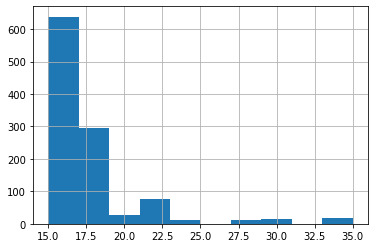

In [25]:
train_set['YearsOfStudy'].hist()

In [26]:
train_set['YearsOfStudy'].mode().values

array([16.])

In [27]:
YearsOfStudy_impute_value = train_set['YearsOfStudy'].mode().values[0]
print(YearsOfStudy_impute_value)
train_set['YearsOfStudy'].fillna(YearsOfStudy_impute_value, inplace=True)

16.0


In [28]:
train_set['YearsOfStudy'].isnull().any()

False

In [29]:
train_set['YearsOfStudy'].value_counts()

16.0    602
18.0    202
15.0    154
17.0     93
21.0     62
19.0     26
35.0     18
29.0     14
23.0     13
22.0     13
27.0     12
Name: YearsOfStudy, dtype: int64

In [30]:
train_set['Qualification'].value_counts()

Grad        569
PostGrad    299
postdoc      27
Phd          13
Name: Qualification, dtype: int64

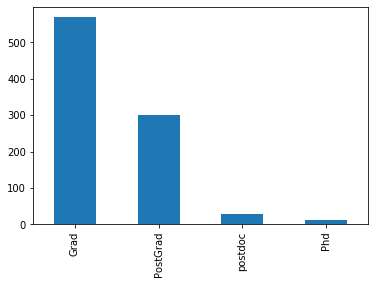

In [19]:
train_set['Qualification'].value_counts().plot(kind='bar')

In [31]:
Qualification_impute_value = train_set['Qualification'].mode().values[0]
print(Qualification_impute_value)
train_set['Qualification'].fillna(Qualification_impute_value, inplace=True)

Grad


In [32]:
Degree_impute_value = train_set['Degree'].mode().values[0]
train_set['Degree'].fillna(Degree_impute_value, inplace=True)

In [33]:
EducationalInstitute_impute_value = train_set['EducationalInstitute'].mode().values[0]
train_set['EducationalInstitute'].fillna(EducationalInstitute_impute_value, inplace=True)

In [34]:
train_set.isnull().any()

Emp #                   False
Designation             False
Experience              False
Salary                  False
AggrBehavScore          False
ActivityScore           False
LinesOfCode             False
Qualification           False
Degree                  False
YearsOfStudy            False
EducationalInstitute    False
Gender                  False
Empl_Band               False
dtype: bool

#### Convert all categorical features to numbers

In [24]:
train_set.select_dtypes(['object']).head()

,Emp #,Designation,Qualification,Degree,EducationalInstitute,Gender,Empl_Band
1296,e37,Sr.Analyst,PostGrad,Mtech,unv,F,A
902,e63,Sr.Dev,PostGrad,Msc,cunv,F,B
1354,e11,Sr.Analyst,Phd,Btech,unv,M,A
1485,e58,Sr.Dev,Grad,Btech,unv,F,B
385,e50,Jr.Dev,PostGrad,Mtech,iit,M,C


In [52]:
train_set.drop('Emp #', axis=1, inplace=True)

* **Label Encoding**

In [35]:
train_set.select_dtypes(['object']).columns

Index(['Emp #', 'Designation', 'Qualification', 'Degree',
       'EducationalInstitute', 'Gender', 'Empl_Band'],
      dtype='object')

* What is Label Encoding ?

In [36]:
train_set['Designation_copy'] = train_set['Designation'].copy()

In [37]:
train_set['Designation_copy'] = pd.Categorical(train_set['Designation_copy'], categories=['Director', 'Jr.Dev', 'Sr.Dev', 
                                                                                    'Manager', 'Sr.Analyst', 'Sr.Manager',
                                                                                   'Analyst'])

In [38]:
train_set['Designation_copy'].cat.categories

Index(['Director', 'Jr.Dev', 'Sr.Dev', 'Manager', 'Sr.Analyst', 'Sr.Manager',
       'Analyst'],
      dtype='object')

In [39]:
#[(category, code) for code, category in enumerate(train_set['Designation'].cat.categories)]

In [40]:
for code, category in enumerate(train_set['Designation_copy'].cat.categories):
    print("Category: ", category , " -- Code: ", code)

Category:  Director  -- Code:  0
Category:  Jr.Dev  -- Code:  1
Category:  Sr.Dev  -- Code:  2
Category:  Manager  -- Code:  3
Category:  Sr.Analyst  -- Code:  4
Category:  Sr.Manager  -- Code:  5
Category:  Analyst  -- Code:  6


In [41]:
train_set['Designation_copy'].cat.codes

1296    4
902     2
1354    4
1485    2
385     1
       ..
1225    1
658     2
578     2
391     2
1044    4
Length: 1209, dtype: int8

In [43]:
train_set['Designation_copy'] = train_set['Designation_copy'].cat.codes

In [44]:
train_set['Designation_copy'].value_counts()

2    498
1    256
4    190
3     86
6     83
0     58
5     38
Name: Designation_copy, dtype: int64

In [45]:
train_set.drop('Designation_copy', axis=1, inplace=True)

In [46]:
cat_list_dict = {'Designation': ['Sr.Dev', 'Analyst', 'Sr.Analyst', 'Manager', 'Jr.Dev', 'Director', 'Sr.Manager'],
                'Qualification': ['Grad', 'PostGrad', 'Phd', 'postdoc'],
                'Degree': ['Btech', 'Bsc', 'Msc', 'Mba', 'IntMsc', 'B.A', 'Mtech'],
                'EducationalInstitute' : ['unv', 'iit', 'clg', 'cunv'],
                'Gender': ['M', 'F'],
                'Empl_Band': ['B', 'C', 'A']}

In [47]:
def convertCategorisToCodes(columns, df):
    for column in columns:
        df[column] = pd.Categorical(df[column], categories = cat_list_dict[column])
        df[column] = df[column].cat.codes

In [50]:
train_set.select_dtypes(['object']).columns.values

array(['Emp #', 'Designation', 'Qualification', 'Degree',
       'EducationalInstitute', 'Gender', 'Empl_Band'], dtype=object)

In [53]:
convertCategorisToCodes(train_set.select_dtypes(['object']).columns.values, train_set)

In [54]:
train_set.dtypes

Designation                int8
Experience              float64
Salary                    int64
AggrBehavScore          float64
ActivityScore             int64
LinesOfCode               int64
Qualification              int8
Degree                     int8
YearsOfStudy            float64
EducationalInstitute       int8
Gender                     int8
Empl_Band                  int8
dtype: object

#### Let's understand pair-wise relationship between "Salary" and other input variables

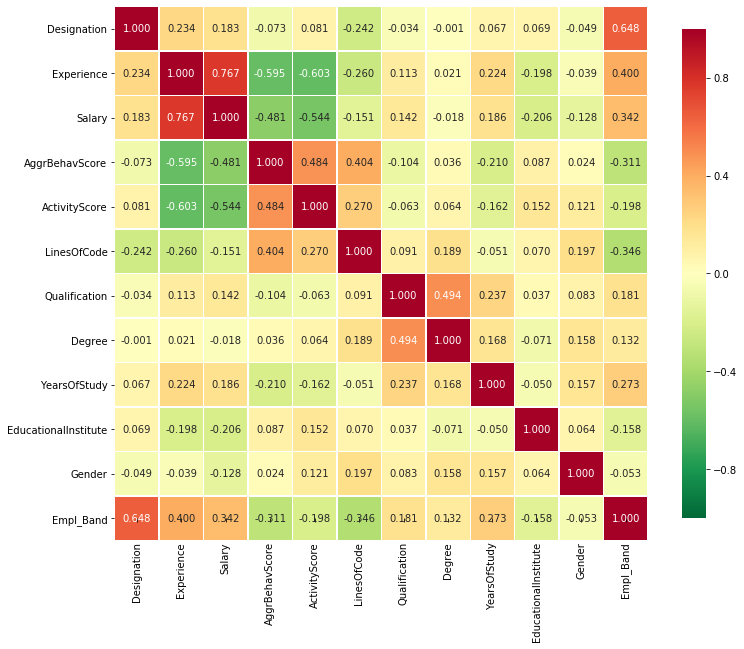

In [55]:
plt.rcParams['xtick.major.pad']=20

fig, ax = plt.subplots(figsize=(12,9)) 
heatmap = sns.heatmap(train_set.corr(), cmap='RdYlGn_r', fmt='.3f', annot=True,  
                      clip_on=False, xticklabels=True, vmin=-1, vmax=1, linewidth=0.5, square=True)
heatmap = plt.yticks(rotation=0)

#### Let's build a Multiple Linear Regressin model

In [56]:
[x for x in train_set.columns if x not in ['Salary']]

['Designation',
 'Experience',
 'AggrBehavScore',
 'ActivityScore',
 'LinesOfCode',
 'Qualification',
 'Degree',
 'YearsOfStudy',
 'EducationalInstitute',
 'Gender',
 'Empl_Band']

In [58]:
train_X = train_set.loc[:,[x for x in train_set.columns if x not in ['Salary']]]
train_y = train_set['Salary']

In [59]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
train_prediction = lr_model.predict(train_X)

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [62]:
train_r2_score = r2_score(train_y, train_prediction)
train_mse = mean_squared_error(train_y, train_prediction)

print("Train R2 Score : ", train_r2_score)
#print("Train Mean Squared Error : ", train_mse)
print("Train Root Mean Squared Error : ", np.sqrt(train_mse))

Train R2 Score :  0.6284028962672604
Train Root Mean Squared Error :  11775.573518588393


#### Let's test the model on TEST set

In [63]:
test_set.loc[test_set[test_set['LinesOfCode'] < 0].index.values, 'LinesOfCode'] = 0
test_set.drop('Emp #', axis=1, inplace=True)
test_set['YearsOfStudy'].fillna(YearsOfStudy_impute_value, inplace=True)
test_set['Qualification'].fillna(Qualification_impute_value, inplace=True)
test_set['Degree'].fillna(Degree_impute_value, inplace=True)
test_set['EducationalInstitute'].fillna(EducationalInstitute_impute_value, inplace=True)
convertCategorisToCodes(test_set.select_dtypes(['object']).columns.values, test_set)

In [64]:
test_X = test_set.loc[:,['Designation', 'Experience', 'AggrBehavScore', 'ActivityScore', 'LinesOfCode', 'Qualification',
 'Degree', 'YearsOfStudy', 'EducationalInstitute', 'Gender', 'Empl_Band']]
test_y = test_set['Salary']

In [65]:
test_prediction = lr_model.predict(test_X)

In [66]:
test_r2_score = r2_score(test_y, test_prediction)
test_mse = mean_squared_error(test_y, test_prediction)

print("TEST R2 Score : ", test_r2_score)
#print("TESt Mean Squared Error : ", test_mse)
print("TEST Root Mean Squared Error : ", np.sqrt(test_mse))

TEST R2 Score :  0.6601301396583457
TEST Root Mean Squared Error :  11557.281074591092


* Learning curve to understand where the problem exists - Data or Algorithm

In [50]:
def plot_learning_curves():
    train_errors, test_errors = [], []
    for m in range(1, len(train_X)):
        lr_model.fit(train_X[:m], train_y[:m])
        train_prediction = lr_model.predict(train_X[:m])
        test_prediction = lr_model.predict(test_X)
        train_errors.append(np.sqrt(mean_squared_error(train_prediction, train_y[:m])))
        test_errors.append(np.sqrt(mean_squared_error(test_prediction, test_y)))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

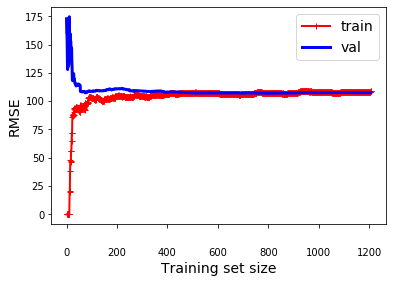

In [51]:
plot_learning_curves()

#### Regression Analysis - Analyze model results and understand relation between ALL-INPUT and OUTPUT variable.
  * We need to plot Residuals vs Fitted Graph to understand relation between ALL-INPUT and OUTPUT (Salary) variables.

In [52]:
residuals = train_y - train_prediction

In [53]:
def standard_scale(val):
    mean_vals = np.mean(val)
    std_vals = np.std(val)
    z_vals = [(x - mean_vals)/std_vals for x in val]
    return z_vals

Text(0, 0.5, 'STD Residual values')

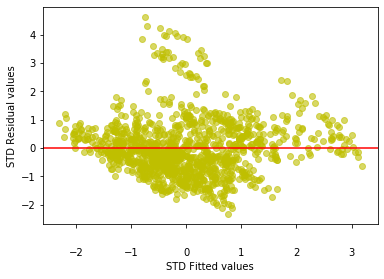

In [54]:
std_residuals = standard_scale(residuals)
std_predicted = standard_scale(train_prediction)

plt.scatter(std_predicted, std_residuals, alpha = 0.6, color='y')
l = plt.axhline(y=0, color='r')
plt.xlabel('STD Fitted values')
plt.ylabel('STD Residual values')